<a href="https://colab.research.google.com/github/Khizar3333/langGrapgh/blob/master/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith_api_key=userdata.get('langsmith_api_key')


In [ ]:
import os
os.environ['LANGCHAIN_API_KEY']=langsmith_api_key
os.environ['LANGCHAIN_TRACING_V2']='true'
os.environ['LANGCHAIN_PROJECT']='LangGraph'

In [ ]:
from langchain_groq import ChatGroq

model = ChatGroq(groq_api_key=groq_api_key,model_name='llama3-8b-8192')

## Start building chatbot using langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]


In [ ]:
graph_builder=StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def Chatbot(state:State):
  return {'messages':model.invoke(state['messages'])}

In [ ]:
graph_builder.add_node('Chatbot',Chatbot)

In [ ]:
graph_builder.add_edge(START,'Chatbot')
graph_builder.add_edge('Chatbot',END)

In [ ]:
graph=graph_builder.compile()

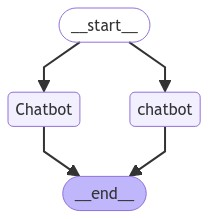

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
while True:
  user_input=input('User :')
  if user_input.lower() in ['quit','q']:
    print('Bye')
    break
  for event in graph.stream({'messages':('user',user_input)}):
    print(event.values)
    for value in event.values():
      print(value['messages'])
      print('Assistant',value['messages'].content)


User :hello
<built-in method values of AddableUpdatesDict object at 0x7b0f80fdafc0>
content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?" response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.021666667, 'prompt_time': 0.001006468, 'queue_time': 0.016056209, 'total_time': 0.022673135}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_af05557ca2', 'finish_reason': 'stop', 'logprobs': None} id='run-9a10d628-c4ed-4c79-958b-e88bed62fba8-0' usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37}
Assistant Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?
<built-in method values of AddableUpdatesDict object at 0x7b0f810f2980>
content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?" response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_